<a href="https://colab.research.google.com/github/dsklnr/Washington_Real_Estate/blob/Marvin_Moran_Branch/ADS_500B_Final_Project_Part_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# impact packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import skewtest, stats
from tabulate import tabulate
import seaborn as sns

In [3]:
# Import the data from the house sales csv file and create a DataFrame
salesdata = pd.read_csv("house_sales.csv")
df = pd.DataFrame(salesdata)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3.0,1.00,1180.0,5650.0,1.0,0.0,0.0,...,7.0,1180.0,0.0,1955.0,0.0,98178.0,47.5112,-122.257,1340.0,5650.0
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,...,7.0,2170.0,400.0,1951.0,1991.0,98125.0,47.7210,-122.319,1690.0,7639.0
2,5631500400,20150225T000000,180000.0,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,...,6.0,770.0,0.0,1933.0,0.0,98028.0,47.7379,-122.233,2720.0,8062.0
3,2487200875,20141209T000000,604000.0,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,...,7.0,1050.0,910.0,1965.0,0.0,98136.0,47.5208,-122.393,1360.0,5000.0
4,1954400510,20150218T000000,510000.0,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,...,8.0,1680.0,0.0,1987.0,0.0,98074.0,47.6168,-122.045,1800.0,7503.0


In [4]:
# Remove all rows with null values
clean_data = df.dropna()
clean_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3.0,1.00,1180.0,5650.0,1.0,0.0,0.0,...,7.0,1180.0,0.0,1955.0,0.0,98178.0,47.5112,-122.257,1340.0,5650.0
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,...,7.0,2170.0,400.0,1951.0,1991.0,98125.0,47.7210,-122.319,1690.0,7639.0
2,5631500400,20150225T000000,180000.0,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,...,6.0,770.0,0.0,1933.0,0.0,98028.0,47.7379,-122.233,2720.0,8062.0
3,2487200875,20141209T000000,604000.0,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,...,7.0,1050.0,910.0,1965.0,0.0,98136.0,47.5208,-122.393,1360.0,5000.0
4,1954400510,20150218T000000,510000.0,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,...,8.0,1680.0,0.0,1987.0,0.0,98074.0,47.6168,-122.045,1800.0,7503.0


In [5]:
# Drop duplicate rows
clean_data.drop_duplicates()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3.0,1.00,1180.0,5650.0,1.0,0.0,0.0,...,7.0,1180.0,0.0,1955.0,0.0,98178.0,47.5112,-122.257,1340.0,5650.0
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,...,7.0,2170.0,400.0,1951.0,1991.0,98125.0,47.7210,-122.319,1690.0,7639.0
2,5631500400,20150225T000000,180000.0,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,...,6.0,770.0,0.0,1933.0,0.0,98028.0,47.7379,-122.233,2720.0,8062.0
3,2487200875,20141209T000000,604000.0,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,...,7.0,1050.0,910.0,1965.0,0.0,98136.0,47.5208,-122.393,1360.0,5000.0
4,1954400510,20150218T000000,510000.0,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,...,8.0,1680.0,0.0,1987.0,0.0,98074.0,47.6168,-122.045,1800.0,7503.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17128,4337600005,20150203T000000,153000.0,2.0,1.00,710.0,9000.0,1.0,0.0,0.0,...,6.0,710.0,0.0,1943.0,0.0,98166.0,47.4811,-122.339,1230.0,9000.0
17129,3645100280,20140613T000000,385000.0,3.0,2.25,1920.0,4833.0,1.0,0.0,0.0,...,7.0,1060.0,860.0,1921.0,0.0,98133.0,47.7067,-122.352,1580.0,5134.0
17130,6170900190,20140819T000000,325000.0,2.0,1.00,750.0,5534.0,1.0,0.0,0.0,...,7.0,750.0,0.0,1947.0,0.0,98177.0,47.7017,-122.360,1050.0,5534.0
17132,4345300050,20140617T000000,294999.0,4.0,2.50,1660.0,9760.0,2.0,0.0,0.0,...,7.0,1660.0,0.0,1994.0,0.0,98030.0,47.3635,-122.188,1580.0,9614.0


**Identify categorical, ordinal, and numerical variables within data bold text**

In [ ]:
# id: Categorical (even though it's numerical, it's just an identifier and has no numerical meaning)
# date: Ordinal (dates have a meaningful order)
# price: Numerical, continuous (house prices can have decimal values)
# bedrooms: Numerical, discrete (countable number of bedrooms)
# bathrooms: Numerical, discrete (countable number of bathrooms, usually in increments of 0.5)
# sqft_living: Numerical, continuous (area measurements can have decimal values)
# sqft_lot: Numerical, continuous (area measurements can have decimal values)
# floors: Numerical, discrete (countable number of floors)
# waterfront: Categorical (binary field with two distinct categories: waterfront or no waterfront)
# view: Categorical (binary field with two distinct categories: view or no view)
# condition: Ordinal (a ranking of the condition of the house)
# grade: Ordinal (a ranking of the grade of the house)
# sqft_basement: Numerical, continuous (area measurements can have decimal values)
# yr_built: Ordinal (years have a meaningful order)
# yr_renovated: Ordinal (years have a meaningful order, with 0 as a special case for not renovated)
# zipcode: Categorical (zipcodes represent distinct geographical areas)
# lat: Numerical, continuous (latitude coordinates are continuous values)
# long: Numerical, continuous (longitude coordinates are continuous values)

In [6]:
# create matrix table with variable types

# Define the variable names and their classifications
variables = {
    'id': 'Categorical',
    'date': 'Ordinal',
    'price': 'Numerical, Continuous',
    'bedrooms': 'Numerical, Discrete',
    'bathrooms': 'Numerical, Discrete',
    'sqft_living': 'Numerical, Continuous',
    'sqft_lot': 'Numerical, Continuous',
    'floors': 'Numerical, Discrete',
    'waterfront': 'Categorical',
    'view': 'Categorical',
    'condition': 'Ordinal',
    'grade': 'Ordinal',
    'sqft_basement': 'Numerical, Continuous',
    'yr_built': 'Ordinal',
    'yr_renovated': 'Ordinal',
    'zipcode': 'Categorical',
    'lat': 'Numerical, Continuous',
    'long': 'Numerical, Continuous'
}

# Create the DataFrame
variable_types = pd.DataFrame(list(variables.items()), columns=['Variable', 'Type'])

# Display the matrix table using tabulate
print(tabulate(variable_types, headers='keys', tablefmt='github'))


|    | Variable      | Type                  |
|----|---------------|-----------------------|
|  0 | id            | Categorical           |
|  1 | date          | Ordinal               |
|  2 | price         | Numerical, Continuous |
|  3 | bedrooms      | Numerical, Discrete   |
|  4 | bathrooms     | Numerical, Discrete   |
|  5 | sqft_living   | Numerical, Continuous |
|  6 | sqft_lot      | Numerical, Continuous |
|  7 | floors        | Numerical, Discrete   |
|  8 | waterfront    | Categorical           |
|  9 | view          | Categorical           |
| 10 | condition     | Ordinal               |
| 11 | grade         | Ordinal               |
| 12 | sqft_basement | Numerical, Continuous |
| 13 | yr_built      | Ordinal               |
| 14 | yr_renovated  | Ordinal               |
| 15 | zipcode       | Categorical           |
| 16 | lat           | Numerical, Continuous |
| 17 | long          | Numerical, Continuous |


**Identify measurements of centrality**

In [7]:
# identify measurements of centrality for (numeric) variables

# define target columns
target_cols = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_basement', 'lat', 'long']
target_dat = clean_data[target_cols]

# calculate centrality
mean_vals = round(target_dat.mean(), 2)
median_vals = round(target_dat.median(),2)
mode_vals = round(target_dat.mode().iloc[0], 2)

# combine results into df and print
central_calc = pd.DataFrame({'Mean': mean_vals, 'Median': median_vals, 'Mode': mode_vals})
print(tabulate(central_calc, headers='keys', tablefmt='github'))

|               |      Mean |    Median |      Mode |
|---------------|-----------|-----------|-----------|
| price         | 534138    | 448175    | 350000    |
| bedrooms      |      3.37 |      3    |      3    |
| bathrooms     |      2.06 |      2    |      2.5  |
| sqft_living   |   2053.89 |   1900    |   1300    |
| sqft_lot      |  15607.4  |   7900    |   5000    |
| floors        |      1.43 |      1    |      1    |
| sqft_basement |    303.36 |      0    |      0    |
| lat           |     47.56 |     47.57 |     47.54 |
| long          |   -122.22 |   -122.23 |   -122.29 |


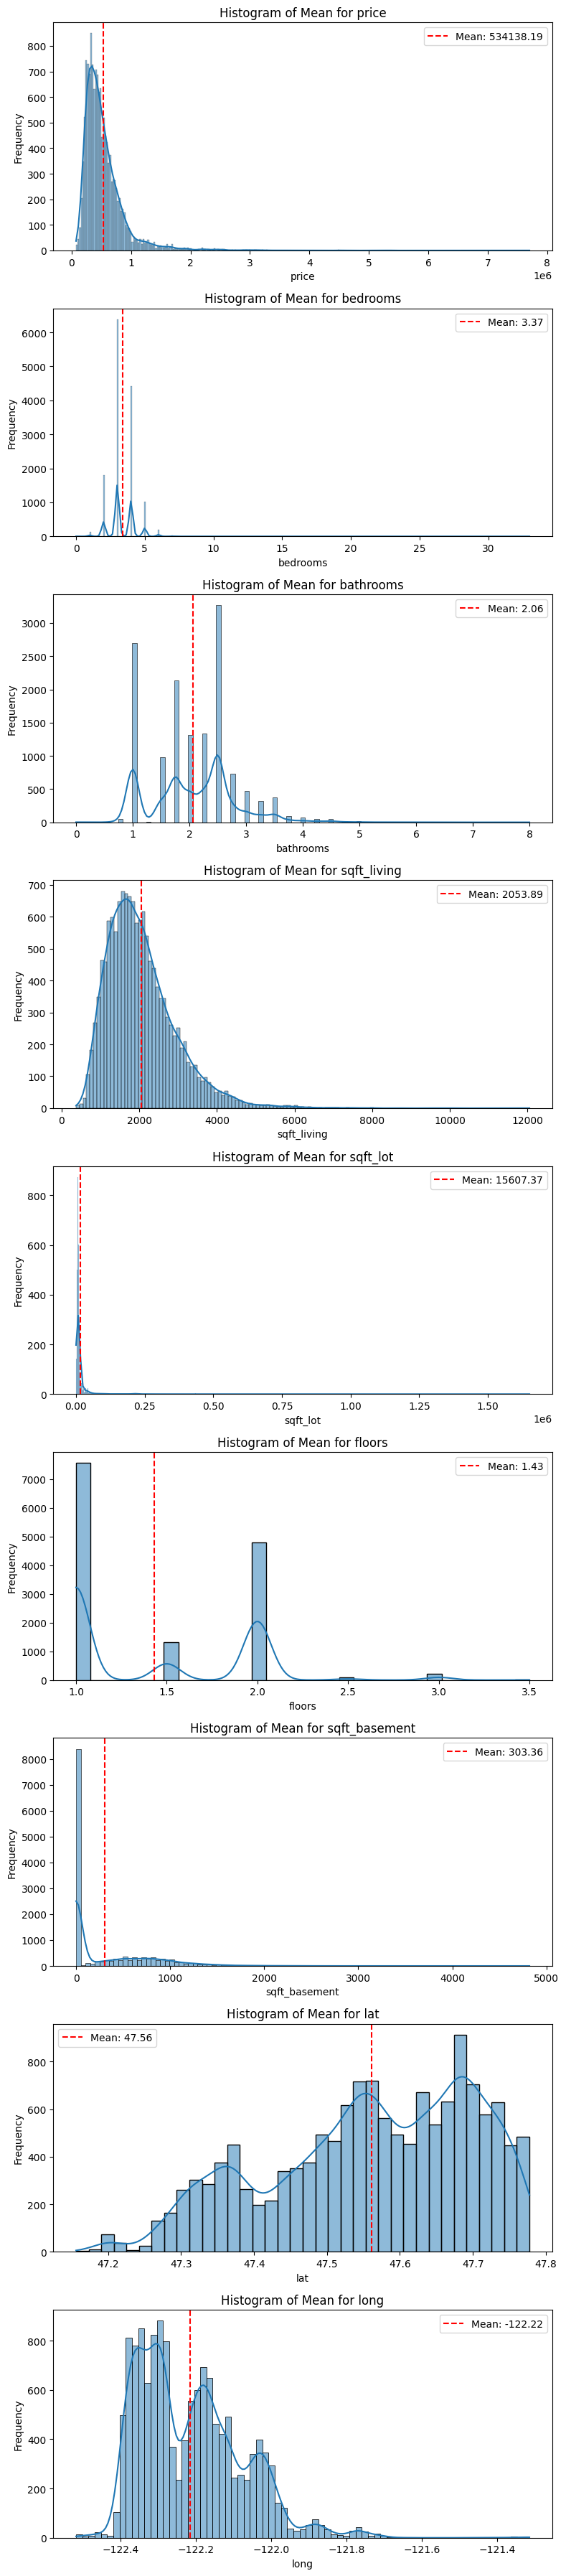

In [8]:
# create visual for MEAN values of (numeric) variables

# select columns
cols_to_plot_mean = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_basement', 'lat', 'long']

# calculate mean values for each column
mean_values = clean_data[target_cols].mean()

# Set up the figure and subplots
n_plots = len(cols_to_plot_mean)
fig, axes = plt.subplots(n_plots, 1, figsize=(8, 4 * n_plots))

for i, column in enumerate(cols_to_plot_mean):
    # Select the data for the current column
    data = clean_data[column]

    # Get the mean value for the current column
    mean_value = mean_values[column]

    # Create a histogram with a density curve using seaborn
    sns.histplot(data, kde=True, bins='auto', alpha=0.5, ax=axes[i])

    # Add a vertical line for the mean
    axes[i].axvline(mean_value, color='r', linestyle='--', label=f'Mean: {mean_value:.2f}')

    # Add legend and labels
    axes[i].legend()
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')
    axes[i].set_title(f'Histogram of Mean for {column}')

# Show the plots
plt.tight_layout()
plt.show()

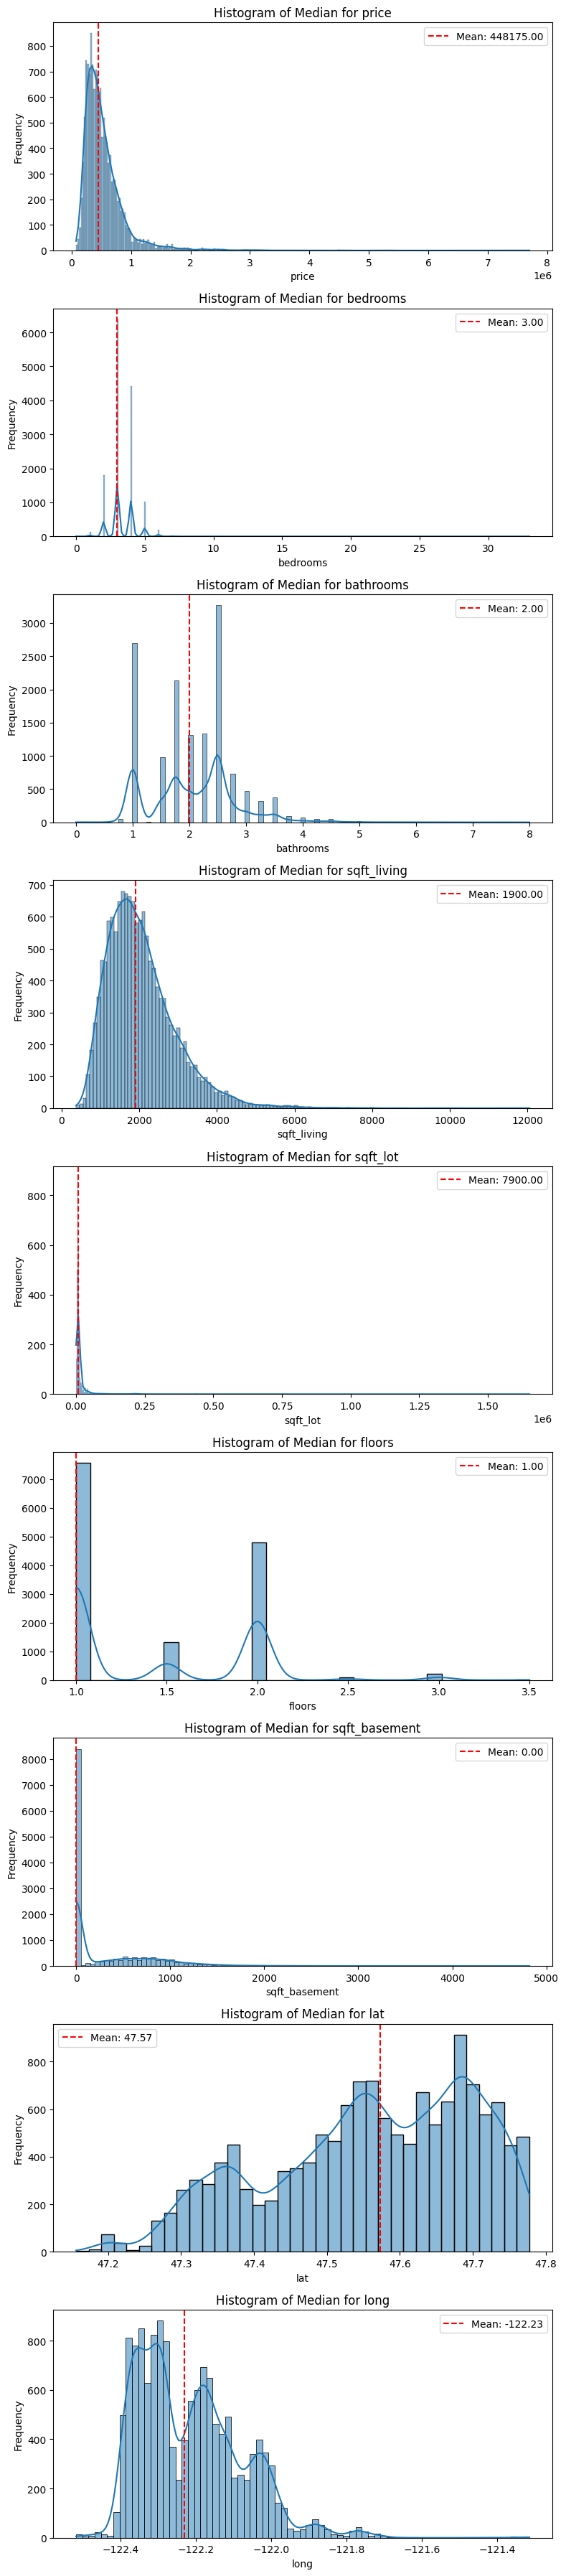

In [9]:
# create visual for MEDIAN values of (numeric) variables

# select columns
cols_to_plot_median = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_basement', 'lat', 'long']

# calculate median values for each column
median_values = clean_data[target_cols].median()

# Set up the figure and subplots
n_plots = len(cols_to_plot_median)
fig, axes = plt.subplots(n_plots, 1, figsize=(8, 4 * n_plots))

for i, column in enumerate(cols_to_plot_median):
    # Select the data for the current column
    data = clean_data[column]

    # Get the median value for the current column
    median_value = median_values[column]

    # Create a histogram with a density curve using seaborn
    sns.histplot(data, kde=True, bins='auto', alpha=0.5, ax=axes[i])

    # Add a vertical line for the median
    axes[i].axvline(median_value, color='r', linestyle='--', label=f'Mean: {median_value:.2f}')

    # Add legend and labels
    axes[i].legend()
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')
    axes[i].set_title(f'Histogram of Median for {column}')

# Show the plots
plt.tight_layout()
plt.show()

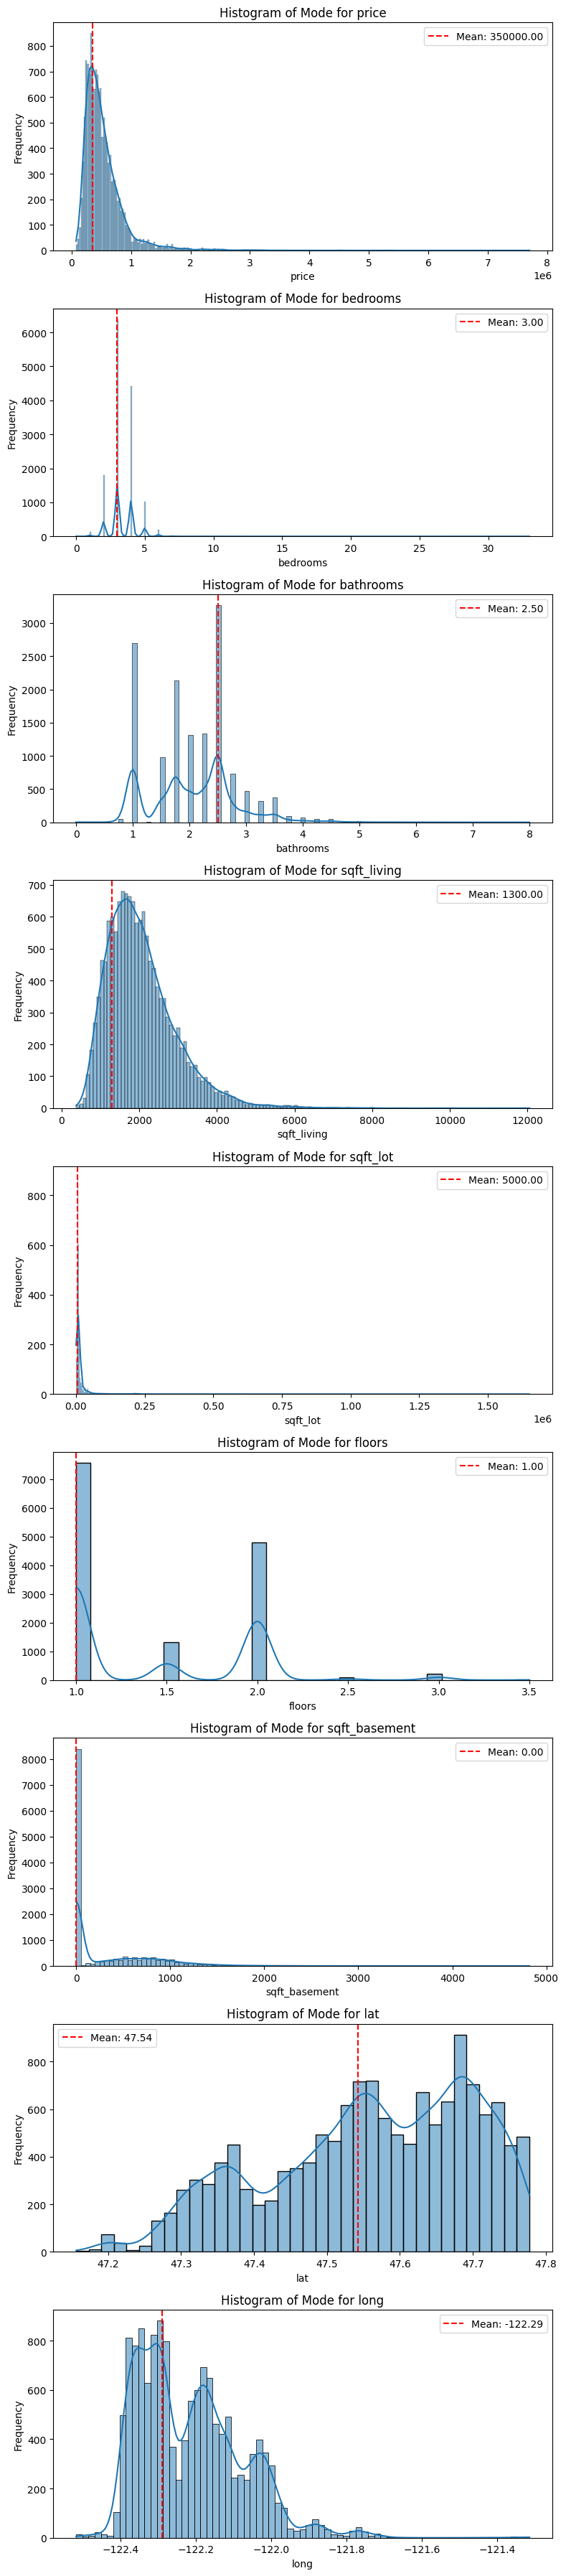

In [10]:
# create visual for MODE values of (numeric) variables

# select columns
cols_to_plot_mode = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_basement', 'lat', 'long']

# calculate mode values for each column
mode_values = clean_data[target_cols].mode().iloc[0]

# Set up the figure and subplots
n_plots = len(cols_to_plot_mode)
fig, axes = plt.subplots(n_plots, 1, figsize=(8, 4 * n_plots))

for i, column in enumerate(cols_to_plot_mode):
    # Select the data for the current column
    data = clean_data[column]

    # Get the mode value for the current column
    mode_value = mode_values[column]

    # Create a histogram with a density curve using seaborn
    sns.histplot(data, kde=True, bins='auto', alpha=0.5, ax=axes[i])

    # Add a vertical line for the mode
    axes[i].axvline(mode_value, color='r', linestyle='--', label=f'Mean: {mode_value:.2f}')

    # Add legend and labels
    axes[i].legend()
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')
    axes[i].set_title(f'Histogram of Mode for {column}')

# Show the plots
plt.tight_layout()
plt.show()

**Identify measurements of distribution**

In [11]:
# identify measurements of distribution for (numeric) variables

# define target columns
target_cols2 = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_basement', 'lat', 'long']

# create empty data frame to store the results
results_df = pd.DataFrame(columns=['Range', 'Variance', 'Standard Deviation', 'Skewness', 'Kurtosis'])

# Loop through the columns and calculate the measures of distribution
for column_name in target_cols2:
    data_range = round(clean_data[column_name].max() - clean_data[column_name].min(), 2)
    data_variance = round(clean_data[column_name].var(), 2)
    data_std_dev = round(clean_data[column_name].std(), 2)
    data_skewness = round(clean_data[column_name].skew(), 2)
    data_kurtosis = round(clean_data[column_name].kurt(), 2)
    
    # Store the results in the DataFrame
    results_df.loc[column_name] = [data_range, data_variance, data_std_dev, data_skewness, data_kurtosis]

# Print the results
print(tabulate(results_df, headers='keys', tablefmt='github'))

|               |           Range |         Variance |   Standard Deviation |   Skewness |   Kurtosis |
|---------------|-----------------|------------------|----------------------|------------|------------|
| price         |     7.625e+06   |      1.33481e+11 |            365351    |       4.16 |      37.81 |
| bedrooms      |    33           |      0.89        |                 0.94 |       2.67 |      70.56 |
| bathrooms     |     8           |      0.57        |                 0.75 |       0.51 |       1.12 |
| sqft_living   | 11680           | 808427           |               899.13 |       1.47 |       4.86 |
| sqft_lot      |     1.65084e+06 |      1.76748e+09 |             42041.3  |      13.76 |     318.49 |
| floors        |     2.5         |      0.26        |                 0.51 |       0.69 |      -0.55 |
| sqft_basement |  4820           | 202659           |               450.18 |       1.53 |       2.59 |
| lat           |     0.62        |      0.02        |          

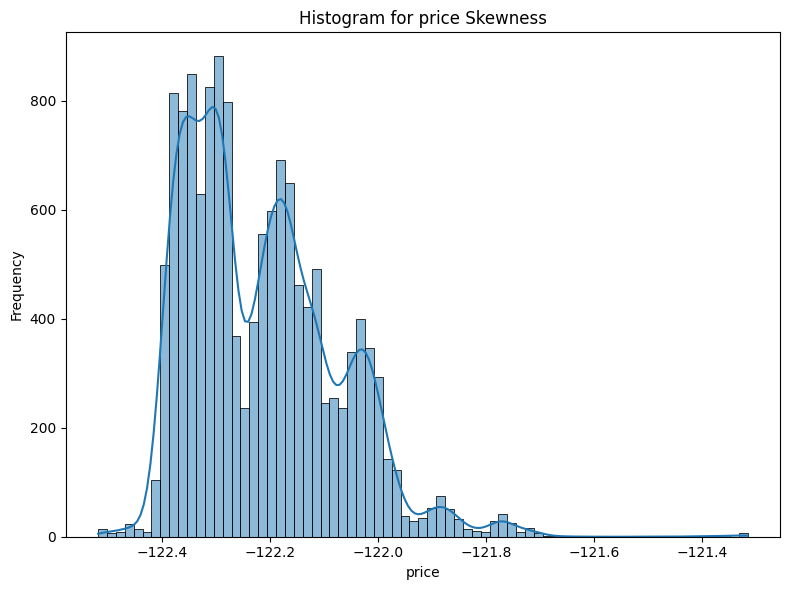

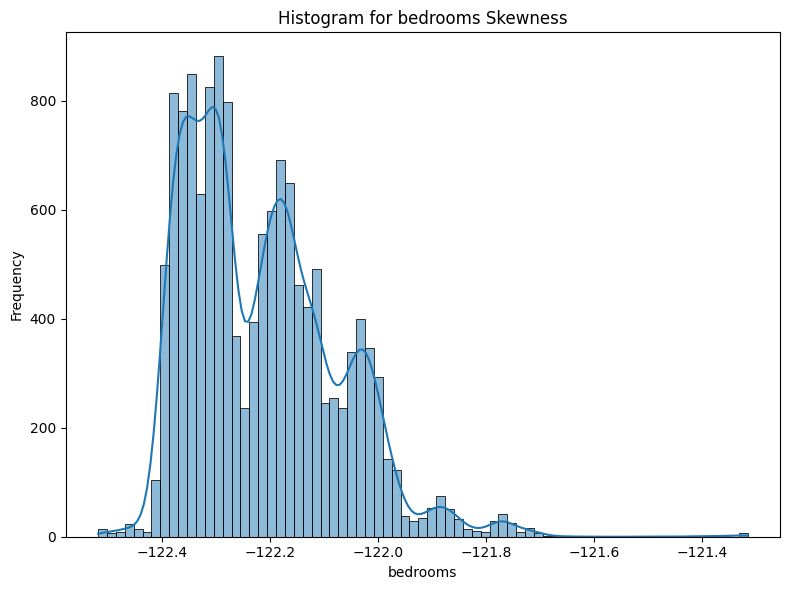

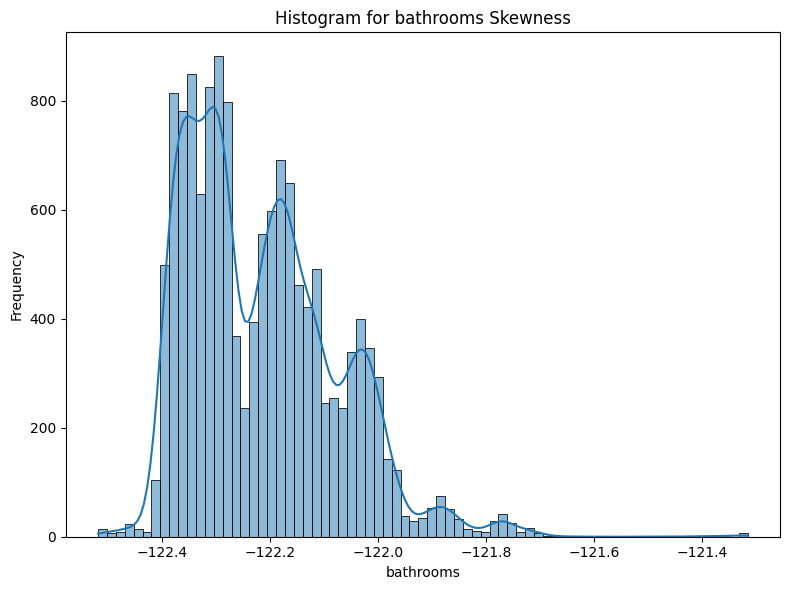

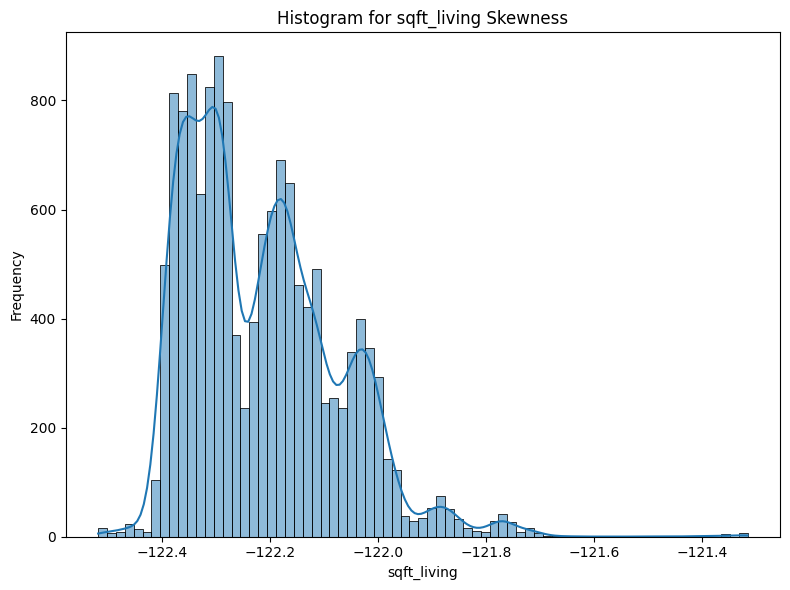

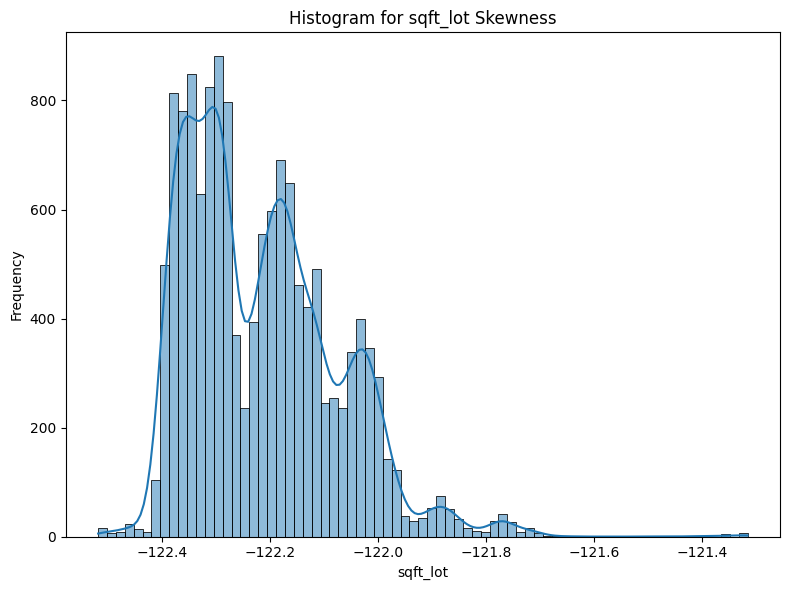

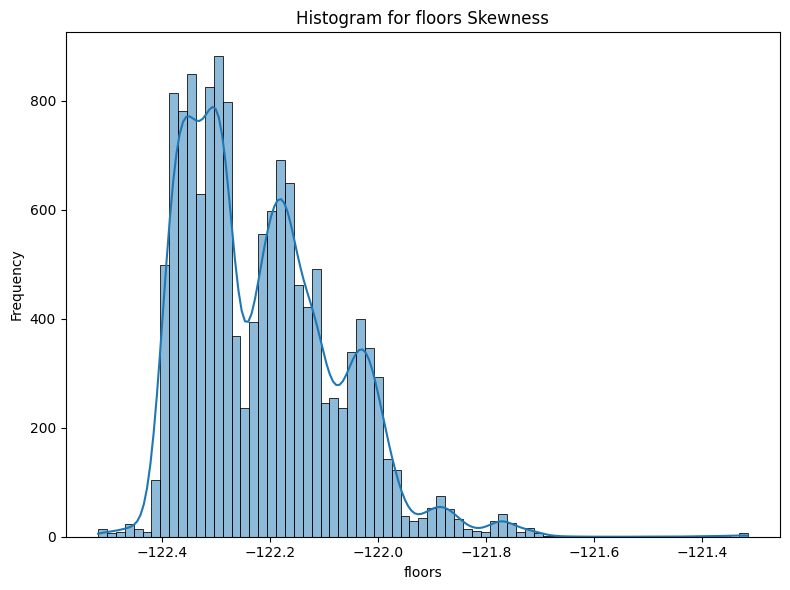

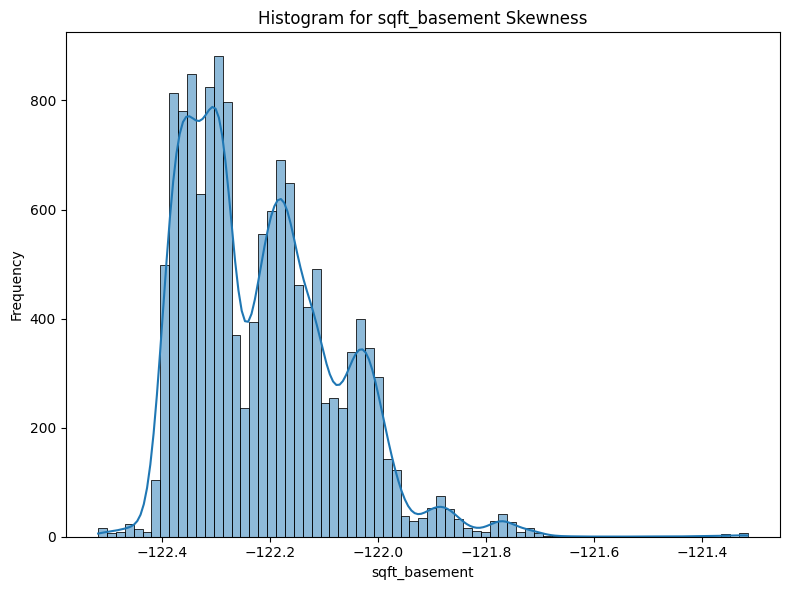

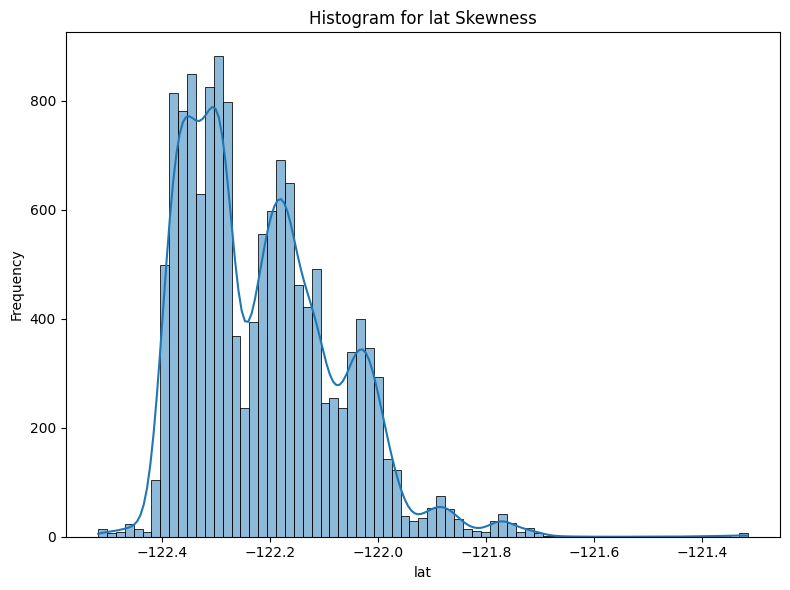

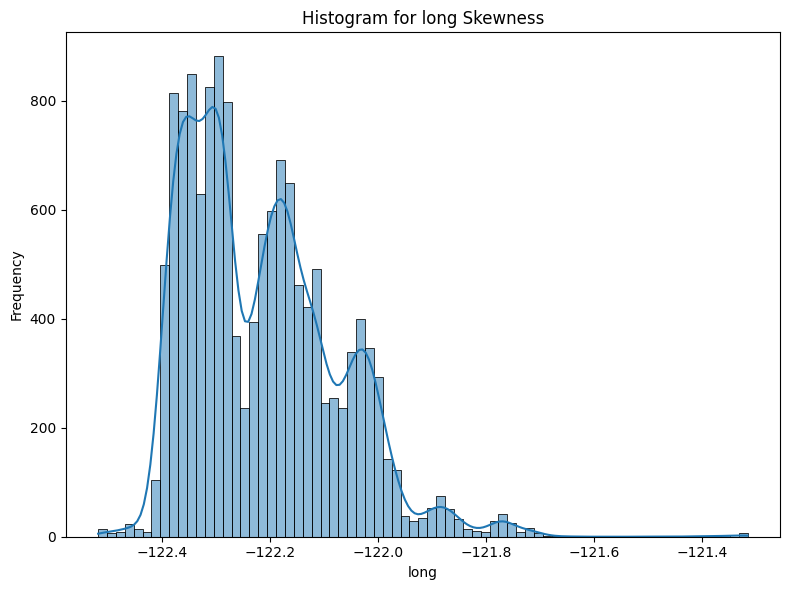

In [12]:
# create visual for skewness of (numeric) variables

# define target columns
target_cols2 = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_basement', 'lat', 'long']

# create empty data frame to store the skewness values
skewness_df = pd.DataFrame(columns=['Skewness'])

# loop through the columns and calculate the skewness
for column_name in target_cols2:
    data_skewness = clean_data[column_name].skew()
    skewness_df.loc[column_name] = [data_skewness]

    # set up the figure and subplot
    fig, ax = plt.subplots(figsize=(8, 6))

    # create a histogram
    sns.histplot(data, kde=True, bins='auto', alpha=0.5, ax=ax)

    # Add labels and title
    ax.set_xlabel(column_name)
    ax.set_ylabel('Frequency')
    ax.set_title(f'Histogram for {column_name} Skewness')

    # Show the plot
    plt.tight_layout()
    plt.show()

**Correlation and Dependent v. Independent Variables**

In [13]:
# create a Pearson correlation table

# calculate correlation coeffificients and place in matrix table
corr_matrix = clean_data.corr()
print(tabulate(corr_matrix, headers='keys', tablefmt='github'))

|               |           id |      price |    bedrooms |    bathrooms |   sqft_living |    sqft_lot |     floors |   waterfront |       view |   condition |      grade |   sqft_above |   sqft_basement |   yr_built |   yr_renovated |     zipcode |         lat |       long |   sqft_living15 |   sqft_lot15 |
|---------------|--------------|------------|-------------|--------------|---------------|-------------|------------|--------------|------------|-------------|------------|--------------|-----------------|------------|----------------|-------------|-------------|------------|-----------------|--------------|
| id            |  1           | -0.0125357 |  0.00217683 | -0.000112259 |   -0.00992716 | -0.137364   |  0.0137523 |  -0.00393432 |  0.0143606 | -0.0185535  |  0.0081475 |   -0.0132673 |      0.003827   |  0.0163614 |   -0.0184008   | -0.00948304 |  0.00207987 |  0.0139813 |     -0.0108405  | -0.146454    |
| price         | -0.0125357   |  1         |  0.29836    |  0.522009 

<ipython-input-13-5d43dd518fcb>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = clean_data.corr()


In [21]:
# identify significant variables (defined by >= 70%)

# variables with correlation values greater than 0.7 (excluding the diagonal)
high_corr = corr_matrix.where((abs(corr_matrix) > 0.7) & (corr_matrix != 1)).stack()

# convert results to a data frame
high_corr_df = pd.DataFrame(high_corr).reset_index()
high_corr_df.columns = ['Variable 1', 'Variable 2', 'Correlation']

# # sort data frame by the Correlation column only in descending order
# high_corr_df = high_corr_df.sort_values(by='Correlation', ascending=False)

# # print results
# print(tabulate(high_corr_df, headers='keys', tablefmt='psql', showindex=False))

# sory the data frame by 'Variable 1' and 'Correlation' columns in descending order
sorted_high_corr_df = high_corr_df.sort_values(by=['Variable 1', 'Correlation'], ascending=[True, False])

# print results
print(tabulate(sorted_high_corr_df, headers='keys', tablefmt='psql', showindex=False))

+---------------+---------------+---------------+
| Variable 1    | Variable 2    |   Correlation |
|---------------+---------------+---------------|
| bathrooms     | sqft_living   |      0.758445 |
| grade         | sqft_living   |      0.769081 |
| grade         | sqft_above    |      0.764402 |
| grade         | sqft_living15 |      0.739608 |
| price         | sqft_living   |      0.70313  |
| sqft_above    | sqft_living   |      0.86604  |
| sqft_above    | grade         |      0.764402 |
| sqft_above    | sqft_living15 |      0.728928 |
| sqft_living   | sqft_above    |      0.86604  |
| sqft_living   | grade         |      0.769081 |
| sqft_living   | bathrooms     |      0.758445 |
| sqft_living   | sqft_living15 |      0.755573 |
| sqft_living   | price         |      0.70313  |
| sqft_living15 | sqft_living   |      0.755573 |
| sqft_living15 | grade         |      0.739608 |
| sqft_living15 | sqft_above    |      0.728928 |
| sqft_lot      | sqft_lot15    |      0.724529 |


In [ ]:
# For this study, the dependent variable is the 'price' variable.
# The independent variables are those that have a correlation value >50% (0.50 / -0.50) with 'price':
# sqft-living, grade, sqft_above, sqft_living15, bathrooms.